# **Playing With Matrices Assignments**

## **1)** a) Creating a filled-square in an image:
> In this task we will have to take the length, breath of the square and coordinates of the top left pixel of the square as an input from the user. A filled square of the given coordinates and dimensions should be created in the image.

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|!![](./images/blur_square.png)|

## b) Creating a filled-circle in an image:
> In this task we will have to take the radius and coordinates of the center of the circle as an input from the user. A filled circle of the given coordinates and dimensions should be created in the image.

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|![](./images/blur_circle.png)|

## **2)** a) Creating a hollow square in an image 
> In this Sub-task we will have to take the length, breadth, thickness of the border of the square and coordinates of the top left pixel of the square as an input from the user. A hollow square of the given coordinates and dimensions should be created in the image.

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|![](./images/blur_hollow_sqaure.png)|

* **b)** Creating a hollow circle in an image
> In this task we will have to take the radius and coordinates of the center of the circle and also the thickness of the border as an input from the user. A hollow circle of the given coordinates and dimensions should be created in the image.

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|![](./images/blur_hollow_circle.png)|

## 3) Rotating an image by 180 degrees
> In this task you will have to Rotate the given image by 180 degrees.

```Note : You cannot use the method we used in the demo```

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|![](./images/blur_180.png)|

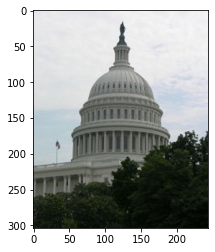

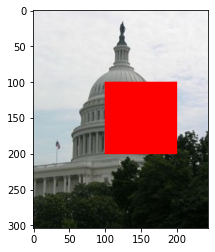

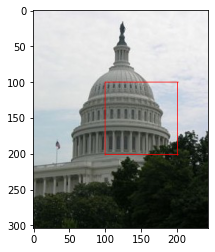

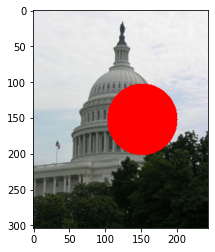

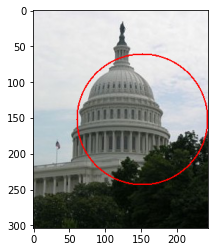

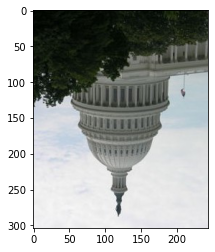

In [6]:
#Importing Libraries
import numpy as np
import math as m
import matplotlib.pyplot as plt

image = plt.imread('images/blur.jpeg')

plt.imshow(image)
plt.show()

#To create a solid sqaure
row, col = 100, 100 
l, b = 100, 100 
image1 = np.copy(image)
image1[row:row+l+1,col:col+b+1]=1*(255,0,0)
plt.imshow(image1)
plt.show()

#To create a hollow square
row, col = 100, 100
t = 2 
image2 = np.copy(image)
for i in range(row,row+l+t+1):
    for j in range(col,col+b+t+1):
        if i==row or i==row+l+t-1 or j==col or j==col+l+t-1:
            image2[i,j]=1*(255,0,0)
plt.imshow(image2)
plt.show()

#To create a solid circle
row, col = int(image.shape[0]/2), int(image.shape[0]/2) 
r = 50 
image3 = np.copy(image)
#r**2=i**2+j**2
for i in range(-(r),r+1):
    j=int(m.sqrt(abs(r**2-i**2)))
    for k in range(j):
        image3[row+i,col+k]=1*(255,0,0)
        image3[row+i,(col-k)]=1*(255,0,0)
plt.imshow(image3)
plt.show()

#To create a hollow circle
row, col = int(image.shape[0]/2), int(image.shape[0]/2)
r = 90 
t = 2 
image4 = np.copy(image)
for i in range(-(r+t),r+t):
    for j in range(-(r+t),r+t):
        if ((i)**2 +(j)**2 >= (r)**2) and ((i)**2 + (j)**2 <=(r+t)**2):
            image4[row+i,col+j]=1*(255,0,0)
plt.imshow(image4)
plt.show()

#To flip the image 180 degrees
image_180 = np.copy(image)
x,y,z=image.shape
for p in range(x):
    for q in range(y):
        image_180[x-p-1,y-q-1]=image[p,q]
        

plt.imshow(image_180)
plt.show()

## Bonus Task

Write the code to rotate the given image by any arbitary angle, as can be seen in the example below. try both bound and non-bound. 

``` Do not use any inbuilt function for this task. Use only Numpy for rotation```

<img width="640" height="450" src="./images/rotate.png">  

**OUTPUT**

|<img width="640" height="450" src="./images/rotate-no-bound.png">|<img width="640" height="450" src="./images/rotate-bound.png">|
|:---:|:---:|
|No Bound|Bound|

In [2]:
# Write Your code here 


# **Convolution Tasks**

***Reference*** code : 

(3, 3)


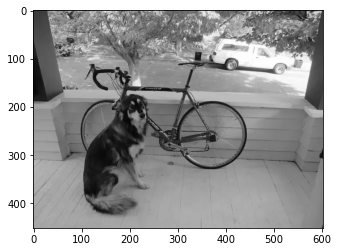

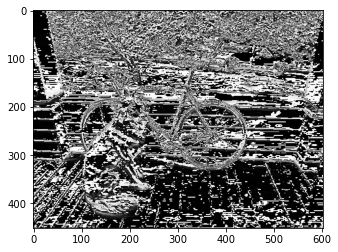

In [3]:
#############Suboptimal implementation of convolution #####################
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolve(kernel, orig_img):
    #####################Flip kernel suboptimally####################
    kernel_inv = np.copy(kernel)
    #print(kernel_inv.shape)
    kernel_inv[0] = kernel[2]
    kernel_inv[2] = kernel[0]
    kernel_inv[:, 0] = kernel_inv[:, 2]
    kernel_inv[:, 2] = kernel_inv[:, 0]
    #################################################################
    img = cv2.copyMakeBorder(orig_img, 1, 1, 1, 1, cv2.BORDER_CONSTANT) # Add padding
    res_img = orig_img.copy()
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
                res_img[i - 1, j - 1] = np.sum(img[i - 1 : i + 2, j - 1 : j + 2] * kernel_inv[:, :])
    return res_img
  
orig_img = cv2.imread("./images/dog_test.png", 0) # Read Image
kernel = np.array([[ 1,  1,  1], [ 0,  0,  0], [-1, -1, -1]]) # Simple vertical gradient kernel

res = convolve(kernel, orig_img)

orig = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
plt.imshow(orig)
plt.show()
plt.imshow(res, cmap = plt.cm.gray)
plt.show()


## Q1. Implement Sobel edge detection with 3x3 Sobel kernels in vertical as well horizontal direction.

## Q2. Apply Gaussian smoothing using normal 2D convolution.

## Q3. Apply Gaussian smoothing using separable 2D convolution.

# **Morphology Assignments**

Original:


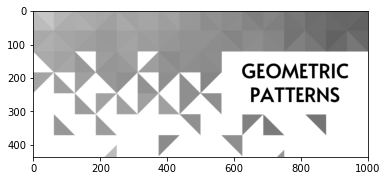

Y Sobel edge detection:


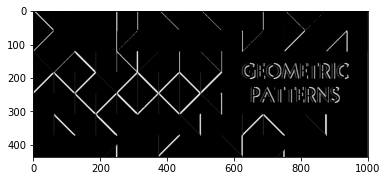

X Sobel edge detection:


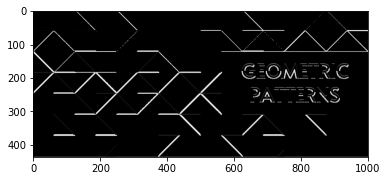

Gaussian blur (using normal convolution)


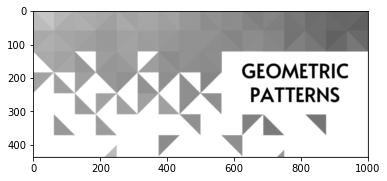

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolve(kernel, orig_img):
    #####################Flip kernel optimally####################
    kernel_inv = np.copy(kernel)
    x,y = kernel.shape
    for p in range(x):
        for q in range(y):
            kernel_inv[x-p-1,y-q-1]=kernel[p,q]
    #################################################################
    img = cv2.copyMakeBorder(orig_img, 1, 1, 1, 1, cv2.BORDER_CONSTANT) # Add padding
    res_img = orig_img.copy()
    a,b=x//2,y//2
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
                res_img[i - 1, j - 1] = np.sum(img[i - a : i + a +1 , j - b : j + b+1] * kernel_inv[:, :])
    return res_img

orig_img = cv2.imread("images\pattern2.jpg", 0) # Read Image
kernel1 = (np.array([[ -1,  0, 1], [ -2,  0,  2], [ -1, 0, 1]]))/9
kernel2 = (np.array([[ -1,  -2, -1], [ 0,  0,  0], [ 1, 2, 1]]))/9
kgauss = (np.array([[ 1,  2, 1], [ 2,  4,  2], [ 1, 2, 1]]))/16
res1 = convolve(kernel1, orig_img)
res2 = convolve(kernel2, orig_img)
res3 = convolve(kgauss, orig_img)
orig = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

print("Original:")
plt.imshow(orig)
plt.show()
print("Y Sobel edge detection:")
plt.imshow(res1, cmap = plt.cm.gray)
plt.show()

print("X Sobel edge detection:")
plt.imshow(res2, cmap = plt.cm.gray)
plt.show()

print("Gaussian blur (using normal convolution)")
plt.imshow(res3, cmap = plt.cm.gray)
plt.show()


Original image:


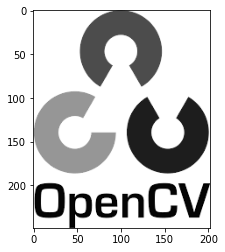

Gaussian Blur (using separable 2D convolution)


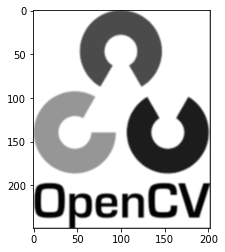

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolve(kernel, orig_img):
    kernel_inv = np.copy(kernel)
    (x,y) = kernel.shape
    for p in range(x):
        for q in range(y):
            kernel_inv[x-p-1,y-q-1]=kernel[p,q]
    img = cv2.copyMakeBorder(orig_img, 1, 1, 1, 1, cv2.BORDER_CONSTANT) # Add padding
    res_img = orig_img.copy()
    a,b=x//2,y//2
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
                res_img[i - 1, j - 1] = np.sum(img[i - a : i + a +1 , j - b : j + b+1] * kernel_inv[:, :])
    return res_img

orig_img = cv2.imread("images\opencv.png", 0)# Read Image
orig = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
kernel1=(np.array([[1],[2],[1]]))/4
kernel2=(kernel1.copy()).T

img2=convolve(kernel1,orig_img)
img3=convolve(kernel2,img2)
print("Original image:")
plt.imshow(orig)
plt.show()
print("Gaussian Blur (using separable 2D convolution)")
plt.imshow(img3,cmap = plt.cm.gray)
plt.show()
        

## Task 1

Write a code to perform Dilation only using libraries like Numpy, PIL


### Algorithm

* Initialize an array with all elements as zero and of size equal to input size. Hint => Use np.zeroes_like()


* Create a padded image. Hint => Use np.zeros()


* Assign the pixels of image to padded image.


* Create 2 for loops to loop through each pixel and convolute.

* If result is greater than 0 output should be 1 else 0




In [7]:
import numpy as np
from PIL import Image

img1 = Image.open("images\morphology.jpg")
img1.show()
#rgb image to grayscale
img2 = img1.convert("L")
#img2.show()
#grayscale to binary
img3 = img2.convert("1")
#img3.show()
#To add padding
img3_arr = np.pad(np.array(img3,int),(1,1))
res=np.zeros((img1.size[1]+1,img1.size[0]+1),int)
# Use this kernel
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])

# Write your code for Dilation here
pix_sum=0
for i in range(1,img1.size[1]):
    for j in range(1,img1.size[0]):
        pix_sum=np.sum(img3_arr[i -1: i + 2, j-1  : j + 2] * kernel[:, :])
        if (pix_sum>0):
            res[i,j]=1
        else:
            res[i,j]=0
res_img = Image.fromarray((res*255).astype(np.uint8))
#Image.fromarray has some issue where its input can only be of the form of uint8
res_img.show()

## Task 2

Write a code to perform Erosion only using libraries like Numpy, PIL


### Algorithm

* Initialize an array with all elements as zero and of size equal to input size. Hint => Use np.zeroes_like()


* Create a padded image. Hint => Use np.zeros()


* Assign the pixels of image to padded image:


* Create 2 for loops to loop through each pixel and convolute.

* If result is 5 then output should be 1 else 0.

In [72]:
import numpy as np
from PIL import Image

# First convert your input rgb image to grayscale
# Then convert grayscale image to binary
img1 = Image.open("images\download.png")
img1.show()
#rgb image to grayscale
img2 = img1.convert("L")
img2.show()
#grayscale to binary
img3 = img2.convert("1")
img3.show()
#To add padding
img3_arr = np.pad(np.array(img3,int),(1,1))
res=np.zeros((img1.size[1]+1,img1.size[0]+1),int)
# Google the kernel used for erosion
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])
# Write your code for Erosion here
pix_sum=0
for i in range(1,img1.size[1]):
    for j in range(1,img1.size[0]):
        pix_sum=np.sum(img3_arr[i - 1: i + 2, j - 1 : j + 2] * kernel[:, :])
        if (pix_sum==5):
            res[i,j]=1
        else:
            res[i,j]=0
res_img = Image.fromarray((res*255).astype(np.uint8))
#Image.fromarray has some issue where its input can only be of the form of uint8 array
res_img.show()

## Bonus Task:

Write a code to perform Opening, Closing and Gradient using Numpy, PIL

# **OpenCV Assignments**

## Task 1

Read an Image and Apply Filters to Detect Edges using OpenCV functions:

1. Canny Edge Detection

![](https://miro.medium.com/max/566/1*XAgKINgc2c2gNa2nV3zbNQ.png)


2. Sobel Edge Detection

![](https://gtms1337.files.wordpress.com/2013/03/cameraman.png)


Apply Filters to Blur an Image:

1. Gaussian Filter
2. Median Filter
3. Box Filter

![](https://miro.medium.com/max/1200/1*BYhANv5m95gdqbfFIg8Msg.jpeg)


## Bonus Task

Apply Edge Detection and Blur Filters on a video

In [57]:
#Edge detections
import cv2
img=cv2.imread("images\canny.png")
canny_edge=cv2.Canny(img,100,210)
sobel_edge=cv2.Sobel(src=img, ddepth=-1, dx=1, dy=1,ksize=5)

cv2.imshow("Original image",img)
cv2.imshow("Canny edge detection",canny_edge)
cv2.imshow("Sobel Edge detection",sobel_edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
#Blurs
import cv2
img1=cv2.imread("images\canny.png")
box_filter=cv2.boxFilter(src=img1, ddepth=-1, ksize=(9,9))
median_filter=cv2.medianBlur(img1,9)
gaussian=cv2.GaussianBlur(img1,(9,9),sigmaX=0)

cv2.imshow("Original image",img1)
cv2.imshow("Box blur(Averaging) filter",box_filter)
cv2.imshow("Median filter",median_filter)
cv2.imshow("Gaussian filter",gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Task 2

Apply OpenCV Functions to perform Morphological Operations:

1. Erosion
2. Dilation
3. Gradient

![](https://static.packt-cdn.com/products/9781785283932/graphics/B04554_02_15.jpg)

In [12]:
# Write your Code Here
import cv2
import numpy as np
img1=cv2.imread("images\morphology.jpg")
Ker=np.array([[0, 1, 0],
              [1, 1, 1],
              [0, 1, 0]],np.uint8)
cv2.imshow("Input",img1)

# Erosion
img2=cv2.erode(img1, Ker,10)
cv2.imshow("Erosion",img2)

# Dilation
img3=cv2.dilate(img1, Ker,10)
cv2.imshow("Dilation",img3)

# Gradient
img4=cv2.subtract(img3,img2)
cv2.imshow("Gradient",img4)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Task 3

* Blur and Downsample an image using a single function
* Blur and Upsample an image using a single function
* Calculate the first order image derivative in both x and y using a Sobel operator.


In [44]:
# Write your Code Here
import cv2
import numpy as np
def convolve(kernel, orig_img):
    kernel_inv = np.copy(kernel)
    x,y = kernel.shape
    for p in range(x):
        for q in range(y):
            kernel_inv[x-p-1,y-q-1]=kernel[p,q]
    img = cv2.copyMakeBorder(orig_img, 1, 1, 1, 1, cv2.BORDER_CONSTANT) # Add padding
    res_img = orig_img.copy()
    a,b=x//2,y//2
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
                res_img[i - 1, j - 1] = np.sum(img[i - a : i + a +1 , j - b : j + b+1] * kernel_inv[:, :])
    return res_img

kernel=(np.array([[ 1,  1, 1], [ 1,  1,  1], [ 1, 1, 1]]))/9
img1=cv2.imread("images\morphology.jpg")
cv2.imshow("Input",img1)

#Blur and downsample
img3=cv2.pyrDown(convolve(kernel,img1.copy()))
cv2.imshow("Downsampled image",img3)

#Blur and upsample
img2=cv2.pyrUp(convolve(kernel,img1.copy()))
cv2.imshow("Upsampled image",img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
import cv2
img=cv2.imread("images\pattern.jpg")
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fodx=cv2.Sobel(src=img_bw, ddepth=-1, dx=0, dy=1, ksize=5)
fody=cv2.Sobel(src=img_bw, ddepth=-1, dx=1, dy=0, ksize=5)
cv2.imshow("Input ",img_bw)
cv2.imshow("First order image derivative in x direction",fodx)
cv2.imshow("First order image derivative in y direction",fody)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Bonus Task


## TASK 2
Playing With Contours
* Refer [OpenCV docs](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html) and study the types of contours
* Task is to find 4 points i.e. leftmost rightmost top and bottom point as shown in the image below.

**INPUT**
![](./images/contour_input.jpeg)

**OUTPUT**
![](./images/contour_output1.jpeg)
![](./images/contour_output2.jpeg)